In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import numpy as np
import random as rd

In [2]:
df = pd.read_csv('datasets/USArrests.csv', sep=',', encoding='CP949')
df.columns=['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
x=df.drop(columns=['State'])
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_df = pd.DataFrame(x_scaled, columns=['Murder','Assault','UrbanPop','Rape'])

C:\Users\SEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


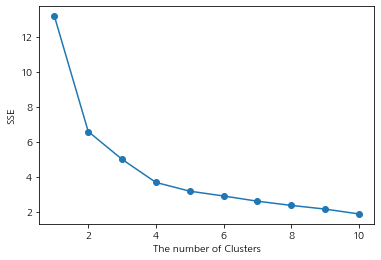

[13.184122550256447, 6.596893867946197, 5.010878493006418, 3.690820410392111, 3.1911357068589448, 2.915978049219016, 2.6176421160478522, 2.378112911832304, 2.167604626798524, 1.890872538481944]


In [4]:
# 엘보우 기법
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
def elbow(x) :
    sse=[]
    for i in range(1,11) :
        km=KMeans(n_clusters=i, random_state=1)
        km.fit(x)
        sse.append(km.inertia_)
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('The number of Clusters')
    plt.ylabel('SSE')
    plt.show()
    print(sse)
elbow(x_df)

In [6]:
from sklearn.metrics import calinski_harabasz_score
# 콜린스키하라바츠스코어
for k in range(2,10) :
    kmeans_model = KMeans(n_clusters = k, random_state=1).fit(x_df)
    labels=kmeans_model.labels_
    print(k, calinski_harabasz_score(x_df, labels))

2 47.9296746438836
3 38.330850690841054
4 39.439460596545736
5 35.22918243388611
6 30.987774970847347
7 28.92925761225181
8 27.26365830148474
9 26.04702613184158


In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
kmeans_model = KMeans(n_clusters=4).fit(x)
x_df['cluster'] = kmeans_model.labels_
x_df['silhoutte_coeff']=silhouette_samples(x_df,x_df['cluster'])
average_score = silhouette_score(x_df, x_df['cluster'])
print(average_score)
print(x_df.groupby('cluster')['silhoutte_coeff'].mean())

0.6366389622692143
cluster
0    0.559984
1    0.715024
2    0.582007
3    0.750892
Name: silhoutte_coeff, dtype: float64


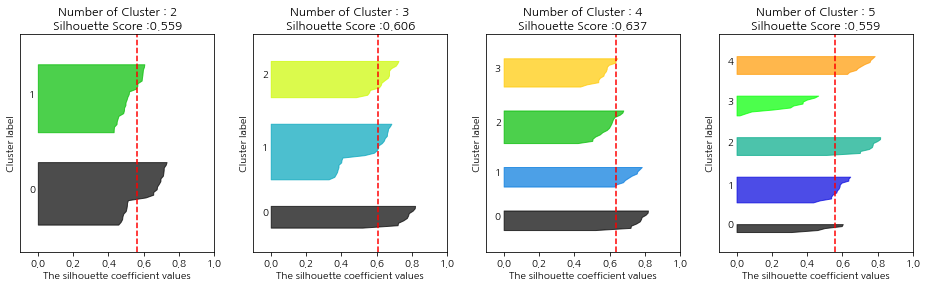

In [11]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
visualize_silhouette([2, 3, 4, 5], x_df)

C:\Users\SEC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\SEC\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


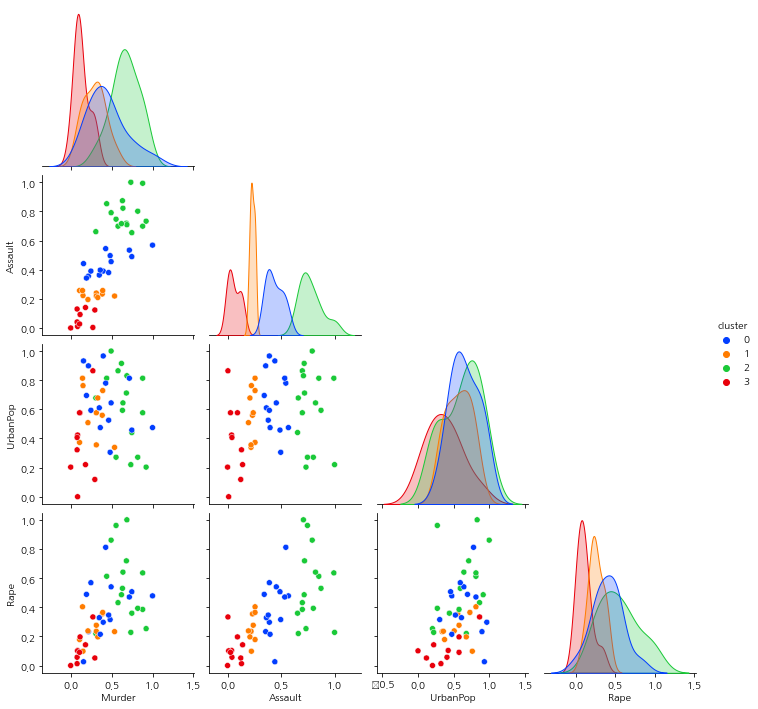

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
x_df1=x_df.drop(columns=['silhoutte_coeff'])
sns.pairplot(x_df1,
            diag_kind='kde',
             hue='cluster',
             corner=True,
             palette='bright')
plt.show()

In [14]:
# 계층적 군집분석
from scipy.cluster.hierarchy import linkage
cluster = linkage(x_df, method='average', metric='euclidean')
print(cluster[-5:])

[[10.         83.          0.68282997 10.        ]
 [ 1.         93.          0.70427894 16.        ]
 [87.         91.          1.13971624 24.        ]
 [94.         95.          1.51973864 26.        ]
 [96.         97.          2.1266943  50.        ]]


군집화 일정표의 1~2열은 병합되는 군집번호, 3열은 군집간 거리, 4열은 군집에 속한 개체 수 이다.   
일정표 끝에서 4번째 단계의 군집간 거리가 0.70에서 두번째 단계인 1.13로 증가하여 폭이 크므로 4개로 나누는것이 적절해 보인다.

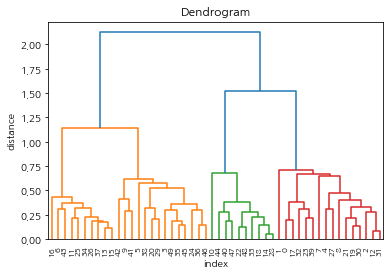

In [18]:
from scipy.cluster.hierarchy import dendrogram
%matplotlib inline
plt.title('Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
dendrogram(cluster)
plt.show()

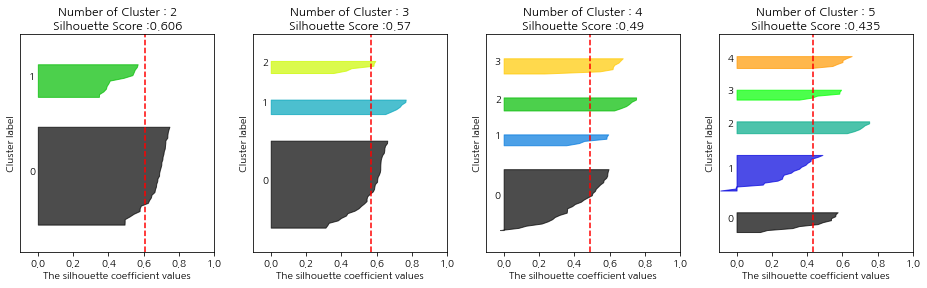

In [48]:
# DBSCAN
df = pd.read_csv('datasets/USArrests.csv', sep=',', encoding='CP949')
df.columns=['State', 'Murder', 'Assault', 'UrbanPop', 'Rape']
x=df.drop(columns=['State'])
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)
x_df = pd.DataFrame(x_scaled, columns=['Murder','Assault','UrbanPop','Rape'])

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
cluster_d = dbscan.fit(x_df)
x_df['cluster_d'] = dbscan.labels_

x_df['silhoutte_coeff']=silhouette_samples(x_df,x_df['cluster_d'])
visualize_silhouette([2, 3, 4, 5], x_df)

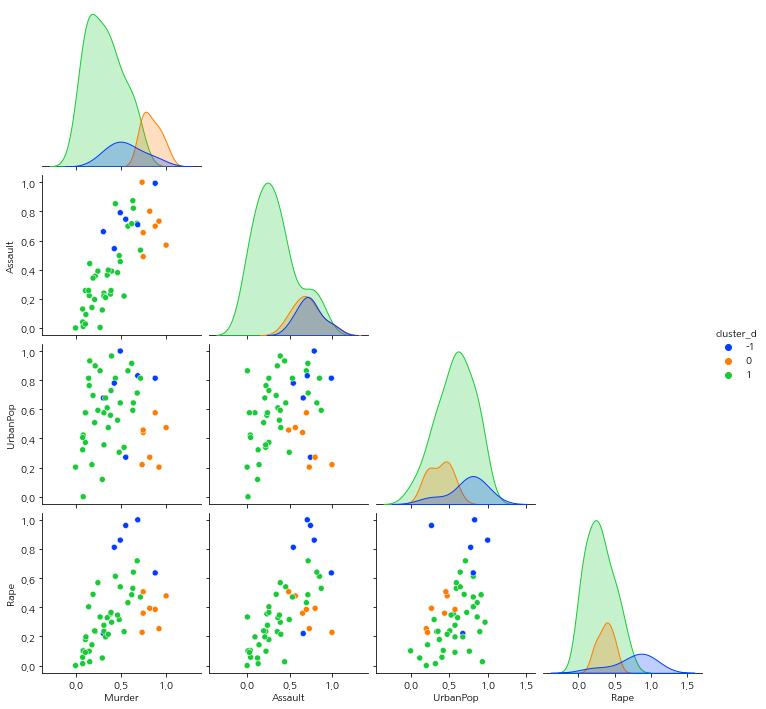

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
x_df1=x_df.drop(columns=['silhoutte_coeff'])
sns.pairplot(x_df1,
            diag_kind='kde',
             hue='cluster_d',
             corner=True,
             palette='bright')
plt.show()

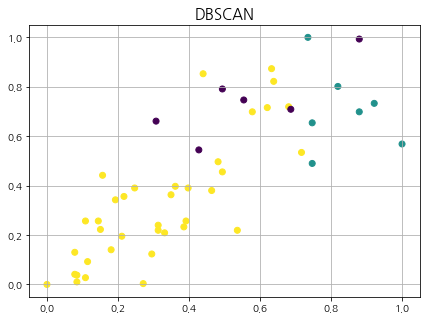

In [50]:
plt.figure(figsize=(7,5))
plt.title("DBSCAN", fontsize=15)
plt.scatter(x_df.iloc[:,0],x_df.iloc[:,1],c=x_df['cluster_d'])
plt.grid()
plt.show()